In [1]:
import UWGeodynamics as GEO
import matplotlib.pyplot as plt
import numpy as np
import underworld as uw
import underworld.function as fn
import glucifer

u = GEO.UnitRegistry

loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
half_rate     = 1. * u.centimeter / u.year 
model_length  = 60. * u.kilometer
model_height  = 24. * u.kilometer
#topTemp       = 0+273
#baseTemp      = 100+213
surfaceTemp   = 273.15 * u.degK
baseModelTemp = 360* u.degK # no data 
bodyforce     = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2 # 1530

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)


GEO.scaling_coefficients["[length]"]      = KL
GEO.scaling_coefficients["[time]"]        = Kt
GEO.scaling_coefficients["[mass]"]        = KM
GEO.scaling_coefficients["[temperature]"] = KT



In [3]:
resolution = (256,128)

Model = GEO.Model(elementRes=resolution, 
                  minCoord=(0. * u.kilometer, -11.4 * u.kilometer), 
                  maxCoord=(60. * u.kilometer, 12.6 * u.kilometer),
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

Model.outputDir="outputs_mixelong"


# In[6]:

Model.minViscosity  = 1e18 * u.pascal * u.second
Model.maxViscosity  = 5e23 * u.pascal * u.second
Model.stressLimiter = 500. * u.megapascal
Model.diffusivity   = 1e-6 * u.metre**2 / u.second
Model.capacity      = 1000. * u.joule / (u.kelvin * u.kilogram)
# Model.minViscosity = 1.0e5 * u.pascal * u.second
# Model.maxViscosity = 1e12 * u.pascal * u.second

In [4]:
# polygons

era_polygon      = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -0.2*u.kilometer),
                                                (60.* u.kilometer, 0.*u.kilometer),
                                                (60.* u.kilometer, -2.4*u.kilometer),
                                                (0.* u.kilometer, -2.9*u.kilometer)])

orubadi_polygon  = GEO.shapes.Polygon(vertices=[(0.* u.kilometer, -2.9*u.kilometer),
                                                (60.* u.kilometer, -2.4*u.kilometer),
                                                (60.* u.kilometer, -4.7*u.kilometer),
                                                (0.* u.kilometer, -4.9*u.kilometer)])

aure_polygon     = GEO.shapes.Polygon(vertices=[(29.37* u.kilometer, -4.8*u.kilometer),
                                                (60.* u.kilometer, -4.2*u.kilometer),
                                                (60.* u.kilometer, -4.7*u.kilometer)])

puri_polygon     = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -4.9*u.kilometer),
                                                (60* u.kilometer, -4.7*u.kilometer),
                                                (60.* u.kilometer, -5.2*u.kilometer),
                                                (0.* u.kilometer, -5.4*u.kilometer)])

mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.4*u.kilometer),
                                                (60* u.kilometer, -5.2*u.kilometer),
                                                (60.* u.kilometer, -9.6*u.kilometer),
                                                (0.* u.kilometer, -9.6*u.kilometer)])

basement_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -6.4*u.kilometer),
                                                (22.5* u.kilometer, -7.4*u.kilometer),
                                                (26.* u.kilometer, -9.4*u.kilometer),
                                                (60* u.kilometer, -9.6*u.kilometer),
                                                (60.* u.kilometer, -16.*u.kilometer),
                                                (0.* u.kilometer, -16.*u.kilometer)])

decollement_orubadi_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -3.9*u.kilometer),
                                                (60.* u.kilometer, -3.7*u.kilometer),
                                                (60.* u.kilometer, -3.8*u.kilometer),
                                                (0.* u.kilometer, -4.*u.kilometer)])

decollement1_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(0.*u.kilometer, -5.9*u.kilometer),
                                                (60.* u.kilometer, -6.1*u.kilometer),
                                                (60.* u.kilometer, -6.2*u.kilometer),
                                                (0.* u.kilometer, -6.*u.kilometer)])

decollement2_mesozoic_polygon = GEO.shapes.Polygon(vertices=[(23.*u.kilometer, -8.9*u.kilometer),
                                                (60.* u.kilometer, -9.1*u.kilometer),
                                                (60.* u.kilometer, -9.2*u.kilometer),
                                                (23.* u.kilometer, -9.*u.kilometer)])

carbonate_polygon = GEO.shapes.Polygon(vertices=[(21.6*u.kilometer, -4.8*u.kilometer),
                                                (22.2* u.kilometer, -4.3*u.kilometer),
                                                (28.125* u.kilometer, -4.3*u.kilometer),
                                                (29.37* u.kilometer, -4.8*u.kilometer)])

In [5]:


air         = Model.add_material(name="Air", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
era         = Model.add_material(name="era",shape=era_polygon)
orubadi     = Model.add_material(name="orubadi", shape=orubadi_polygon)
aure        = Model.add_material(name="aure", shape=aure_polygon)
carbonate   = Model.add_material(name="carbonate", shape=carbonate_polygon)


purimendi   = Model.add_material(name="purimendi", shape=puri_polygon)
mesozoic    = Model.add_material(name="mesozoic", shape=mesozoic_polygon)

decollement_orubadi    = Model.add_material(name="decollement_orubadi", shape=decollement_orubadi_polygon)
decollement1_mesozoic  = Model.add_material(name="decollement1_mesozoic", shape=decollement1_mesozoic_polygon)
decollement2_mesozoic  = Model.add_material(name="decollement2_mesozoic", shape=decollement2_mesozoic_polygon)

basement    = Model.add_material(name="basement", shape=basement_polygon)





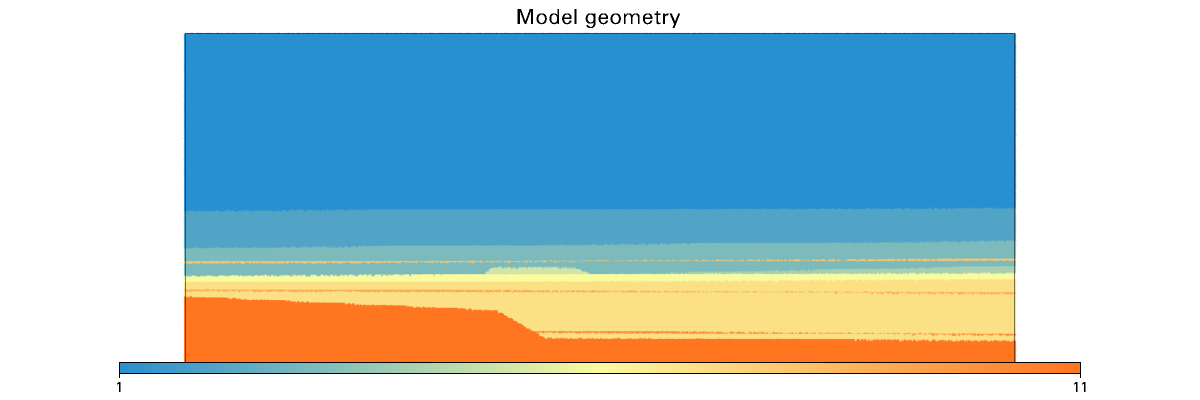

In [6]:
Fig = glucifer.Figure(figsize=(1200,400), title="Model geometry", quality=2)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.)
Fig.show()

In [7]:
# Compressibility should be zero when using Lecode isostasy
#air.diffusivity   = 22e-6 * u.metre**2 / u.second# air.capacity = 100. * u.joule / (u.kelvin * u.kilogram)
air.diffusivity = 1.0e-6 * u.metre**2 / u.second
air.capacity = 1000. * u.joule / (u.kelvin * u.kilogram)


# ## Density

# air.density       = 1. * u.kilogram / u.metre**3
# era.density       = GEO.LinearDensity(2250. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# orubadi.density   = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# aure.density      = GEO.LinearDensity(2400. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# purimendi.density = GEO.LinearDensity(2600. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# basement.density  = GEO.LinearDensity(3500. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# carbonate.density = GEO.LinearDensity(2600. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)

# decollement_orubadi.density    = GEO.LinearDensity(2350. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# decollement1_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)
# decollement2_mesozoic.density  = GEO.LinearDensity(2700. * u.kilogram / u.metre**3, thermalExpansivity=3e-5 / u.kelvin)


## or:

air.density       = 1. * u.kilogram / u.metre**3
era.density       = 2250. * u.kilogram / u.metre**3
orubadi.density   = 2350. * u.kilogram / u.metre**3
aure.density      = 2400. * u.kilogram / u.metre**3 # no data
purimendi.density = 2600. * u.kilogram / u.metre**3 
mesozoic.density  = 2700. * u.kilogram / u.metre**3 
basement.density  = 3500. * u.kilogram / u.metre**3 # no data 2500. to 2900.
carbonate.density = 2650. * u.kilogram / u.metre**3
decollement_orubadi.density    = 2350. * u.kilogram / u.metre**3
decollement1_mesozoic.density  = 2700. * u.kilogram / u.metre**3
decollement2_mesozoic.density  = 2700. * u.kilogram / u.metre**3

 

## Radioganic Heat Production # no data

# era.radiogenicHeatProd       = 1. * u.microwatt / u.meter**3
# orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# aure.radiogenicHeatProd      = 1. * u.microwatt / u.meter**3
# purimendi.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# mesozoic.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3
# basement.radiogenicHeatProd  = 1. * u.microwatt / u.meter**3

# decollement_orubadi.radiogenicHeatProd   = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3
# decollement1_mesozoic.radiogenicHeatProd = 1. * u.microwatt / u.meter**3


## Viscous Rheologies # no data so isoviscous

rh = GEO.ViscousCreepRegistry()



air.viscosity       = 0.00008 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
era.viscosity       = 0.00012 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
orubadi.viscosity   = 0.00008 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
aure.viscosity      = 0.00008 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
purimendi.viscosity = 0.8 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
mesozoic.viscosity  = 0.4 * rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
basement.viscosity  = rh.Wet_Quartz_Dislocation_Goetze_et_al_1978
# fault.viscosity              = 5e22 * u.pascal * u.second
carbonate.viscosity = purimendi.viscosity



decollement_orubadi.viscosity    = 1e22 * u.pascal * u.second
decollement1_mesozoic.viscosity  = 1e22 * u.pascal * u.second
decollement2_mesozoic.viscosity  = 1e22 * u.pascal * u.second


## Plasticities

pl = GEO.PlasticityRegistry()

# sediment.plasticity #same for uppercrust     = GEO.DruckerPrager(name="Sediment Plasticity",
#                                             cohesion=40. * u.megapascal,
#                                             cohesionAfterSoftening=4.0 * u.megapascal,
#                                             frictionCoefficient=0.268,
#                                             frictionAfterSoftening=0.0268,
#                                             epsilon1=0.0, epsilon2=0.15)
# sediment.stressLimiter  = 1000. * u.megapascal



era.plasticity = GEO.DruckerPrager(name="era_pl",
                                         cohesion=5. * u.megapascal, #20.
                                         cohesionAfterSoftening=0.2 * u.megapascal,
                                         frictionCoefficient=0.84,
                                         frictionAfterSoftening=0.5,
                                         epsilon1=0.1, epsilon2=0.25)

orubadi.plasticity = GEO.DruckerPrager(name="orubadi_pl",
                                        cohesion=5. * u.megapascal,
                                        cohesionAfterSoftening=1. * u.megapascal,
                                        frictionCoefficient=0.18,
                                        frictionAfterSoftening=0.05,
                                        epsilon1=0.1, epsilon2=0.25)

aure.plasticity  = GEO.DruckerPrager(name="aure_pl",
                                        cohesion=5. * u.megapascal,
                                        cohesionAfterSoftening=2. * u.megapascal,
                                        frictionCoefficient=0.84,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.1, epsilon2=0.25)

purimendi.plasticity = GEO.DruckerPrager(name="purimendi_pl",
                                        cohesion=10. * u.megapascal,
                                        cohesionAfterSoftening=3. * u.megapascal,
                                        frictionCoefficient=0.577,
                                        frictionAfterSoftening=0.112,
                                        epsilon1=0.1, epsilon2=0.25)

mesozoic.plasticity  = GEO.DruckerPrager(name="mesozoic_pl",
                                         cohesion=10. * u.megapascal,#30
                                         cohesionAfterSoftening=3. * u.megapascal,
                                         frictionCoefficient=0.268,
                                         frictionAfterSoftening=0.112,
                                         epsilon1=0.1, epsilon2=0.25)

basement.plasticity  = GEO.DruckerPrager(name="basement_pl",
                                         cohesion=40. * u.megapascal, #try 20
                                         cohesionAfterSoftening=4. * u.megapascal,
                                         frictionCoefficient=0.2, 
                                         frictionAfterSoftening=0.577,
                                         epsilon1=0.1, epsilon2=0.25)

# fault.plasticity = GEO.DruckerPrager(name="fault_pl",
#                                      cohesion=20. * u.megapascal,
#                                      cohesionAfterSoftening=0.8 * u.megapascal,
#                                      frictionCoefficient=0.577,
#                                      frictionAfterSoftening=0.02308,
#                                      epsilon1=0.0, epsilon2=0.2)

carbonate.plasticity = purimendi.plasticity

decollement_orubadi.plasticity    = era.plasticity
decollement1_mesozoic.plasticity  = mesozoic.plasticity
decollement2_mesozoic.plasticity  = mesozoic.plasticity


era.stressLimiter = 75.0 * u.megapascal
orubadi.stressLimiter   = 75.0 * u.megapascal
aure.stressLimiter      = 75.0 * u.megapascal
purimendi.stressLimiter = 75.0 * u.megapascal
mesozoic.stressLimiter  = 75.0 * u.megapascal
basement.stressLimiter  = 150.0 * u.megapascal
#fault.stressLimiter = 50.0 * u.megapascal

carbonate.stressLimiter = purimendi.stressLimiter

decollement_orubadi.stressLimiter = 75.0 * u.megapascal
decollement1_mesozoic.stressLimiter = 75.0 * u.megapascal
decollement2_mesozoic.stressLimiter = 75.0 * u.megapascal




In [8]:
solidii = GEO.SolidusRegistry()
crust_solidus = solidii.Crustal_Solidus
mantle_solidus = solidii.Mantle_Solidus

liquidii = GEO.LiquidusRegistry()
crust_liquidus = liquidii.Crustal_Liquidus
mantle_liquidus = liquidii.Mantle_Liquidus

basement.add_melt_modifier(crust_solidus, crust_liquidus, 
                         latentHeatFusion=250.0 * u.kilojoules / u.kilogram / u.kelvin,
                         meltFraction=0.,
                         meltFractionLimit=0.3,
                         meltExpansion=0.13, 
                         viscosityChangeX1 = 0.15,
                         viscosityChangeX2 = 0.30,
                         viscosityChange = 1.0e-3
                        )



In [9]:
Model.set_temperatureBCs(top=273. * u.degK, 
                         bottom=320. * u.degK, 
                         materials=[(air, 273. * u.degK), (basement,320. * u.degK)])

Model.set_velocityBCs(left=[0. * u.kilometer / u.year, None],
                      right=[-0.5 * u.centimeter / u.year, None],
                      bottom = [None , 0.])




In [10]:
x_c, y_c = GEO.circles_grid(radius=0.2*u.kilometer, 
                     minCoord=[Model.minCoord[0], basement.bottom], 
                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])

FSE_Crust = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

In [11]:
Model.init_model()

In [12]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Temperature", quality=2)
# Fig.Points(Model.swarm, GEO.Dimensionalize(Model.temperature, u.degK), fn_size=3.0)
# Fig.show()

In [13]:
# Fig = glucifer.Figure(figsize=(1200,400), title="Pressure (MPa)", quality=2)
# Fig.Surface(Model.mesh, GEO.Dimensionalize(Model.pressureField, u.megapascal), fn_size=2.0)
# Fig.show()

In [14]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)
#GEO.rcParams["advection.diffusion.method"] = "SLCN"

In [15]:
x = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 4800) 
y = 0. * u.kilometer

surface_tracers = Model.add_passive_tracers(name="Surface", vertices=[x, y])
moho_tracers = Model.add_passive_tracers(name="Moho", vertices=[x,y-5.*u.kilometer])
Lab_tracers = Model.add_passive_tracers(name="Lab", vertices=[x,y-10.*u.kilometer])

#x = 100. * u.kilometer
#y = np.linspace(Model.minCoord[1], Model.maxCoord[1], 1000) * u.kilometer
#vertical_tracers1 = Model.add_passive_tracers(vertices=[x,y])

x1 = 480. * u.kilometer
y1 = -20. * u.kilometer
pt1_tracer = Model.add_passive_tracers(name="Pt1", vertices=[x1, y1])

#P1 = Model.add_passive_tracers(vertices=[x1,y1])

#moho_tracers.add_tracked_field(Model.temperature, name="moho_tracers" , dataType="float", units=u.degK, count=1, overwrite=True)
#moho_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
moho_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#surface_tracers.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
surface_tracers.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)

#pt1_tracer.add_tracked_field(Model.temperature, name="Temperature" , dataType="float", units=u.degK, count=1, overwrite=True)
#pt1_tracer.add_tracked_field(Model.pressureField, name="Pressure" , dataType="float", units=u.megapascal, count=1, overwrite=True)
#pt1_tracers2 = Model.pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.temperature, name="Pt1_Temp", dataType="float", units=u.degK, count=1, overwrite=True)
pt1_tracer.add_tracked_field(Model.pressureField, name="Pt1_Press", dataType="float", units=u.megapascal, count=1, overwrite=False)
pt1_tracer.add_tracked_field(Model.strainRateField, name="Pt1_StrainRate", dataType="float", units=u.sec, count=1, overwrite=False)
#Moho = moho_tracers.add_variable( dataType="double", count=1 )

In [16]:
# x2 = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 1000) 
# y2 = -10. * u.kilometer
# level_tracers = Model.add_passive_tracers(name="Level", vertices=[x2,y2])
# level_tracers2 = Model.level_tracers.add_tracked_field(Model.strainRateField, name="Lev_StrainRate", dataType="float", units=u.sec, count=1, overwrite=True)

In [17]:
# x_c, y_c = GEO.circles_grid(radius=2.0*u.kilometer, 
#                     minCoord=[Model.minCoord[0], basement.top], 
#                     maxCoord=[Model.maxCoord[0], 0.*u.kilometer])
# circles_c = Model.add_passive_tracers(name="FSE_Crust", vertices=[x_c, y_c])

# x_m, y_m = GEO.circles_grid(radius=2.0*u.kilometer, 
#                     minCoord=[Model.minCoord[0], basement.bottom], 
#                     maxCoord=[Model.maxCoord[0], basement.top])
# circles_m = Model.add_passive_tracers(name="FSE_Mantle", vertices=[x_m, y_m])

# import glucifer
# Fig = glucifer.Figure(figsize=(1200,400), fn_size=4.0)
# Fig.Points(surface_tracers.swarm, pointSize=2.0)
# Fig.Points(moho_tracers.swarm, pointSize=2.0)
# Fig.Points(circles_c.swarm, pointSize=1.5)
# Fig.Points(circles_m.swarm, pointSize=0.1)
# Fig.Points(Model.swarm, Model.materialField, fn_size=2.0)
# Fig.show()





In [18]:
# mohoT = Model.temperature.evaluate(moho_tracers.swarm)[:,0].mean()
# print("Moho Temperature = ", GEO.Dimensionalize(mohoT, u.degC)) 

# LabT = Model.temperature.evaluate(Lab_tracers.swarm)[:,0].mean()
# print("Lab Temperature = ", GEO.Dimensionalize(LabT, u.degC)) 


In [19]:

# MyTemperatureField=(Model.temperature.data[:] * GEO.Dimensionalize(1.0, u.degK)).magnitude 

# TemperatureData=np.asarray(MyTemperatureField)
# #ViscosityDataShaped=ViscosityData.reshape(81,321)
# TemperatureDataShaped=TemperatureData.reshape(resolution[1]+1,resolution[0]+1)

# #Two profiles located at the left walls and the middle.
# plt.plot(TemperatureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
# plt.plot(TemperatureDataShaped[:, resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))

# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# #plt.xscale('log')
# plt.xlabel('Temperature K')
# plt.ylabel('Depth (km)')
# plt.title('Temperature')
# plt.show()



In [20]:
# MyPressureField=(Model.pressureField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# PressureData=np.asarray(MyPressureField)
# #ViscosityDataShaped=ViscosityData.reshape(81,321)
# PressureDataShaped=PressureData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.
# plt.plot(PressureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(PressureDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))

# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# #plt.xscale('log')
# plt.xlabel('Pressure MPa')
# plt.ylabel('Depth (km)')
# plt.title('Pressure')
# plt.show()




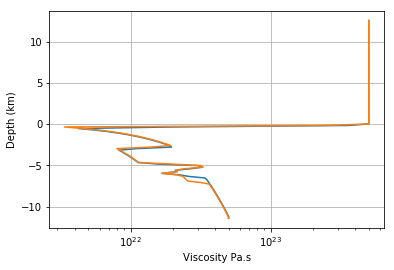

In [21]:
MyViscosityField=(Model.projViscosityField.data[:] * GEO.Dimensionalize(1.0, u.pascal * u.second)).magnitude 

ViscosityData=np.asarray(MyViscosityField)
#ViscosityDataShaped=ViscosityData.reshape(81,321)
ViscosityDataShaped=ViscosityData.reshape(resolution[1]+1,resolution[0]+1)

#Two profiles located at the left walls and the middle.
plt.plot(ViscosityDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(ViscosityDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))



## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
plt.xscale('log')
plt.xlabel('Viscosity Pa.s')
plt.ylabel('Depth (km)')
## plt.title('Viscosity')
plt.show()



In [22]:
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-2
GEO.rcParams["nonlinear.tolerance"] = 1e-2
#GEO.rcParams["solver"] = "mumps"
#GEO.rcParams["penalty"] = 0
GEO.rcParams["swarm.particles.per.cell.2D"] = 30

In [23]:
# Model.solve()


In [24]:
# MyStressField=(Model.projStressField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

# StressData=np.asarray(MyStressField)
# #StressDataShaped=StressData.reshape(120,480)
# StressDataShaped=StressData.reshape(resolution[1],resolution[0])

# #Two profiles located at the left walls and the middle.

# plt.plot(StressDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
# plt.plot(StressDataShaped[:,resolution[1]/2], np.linspace(Model.bottom,Model.top,resolution[1]))


# ## plt.yticks([-700,-300,-150,-40,0,68])
# ## plt.xticks([20, 550.0, 1350])
# plt.grid()
# plt.xlabel('Stress MPa')
# plt.ylabel('Depth (km)')
# plt.title('Deviatoric Stress')
# plt.show()

In [25]:
# Fig = glucifer.Figure(figsize=(1200,400), quality=2)
# Fig.VectorArrows(Model.mesh, GEO.Dimensionalize(Model.velocityField, u.millimeter / u.year), fn_size=2.0)
# Fig.show()

In [ ]:
#help(Model.run_for)
# Model.run_for(nstep=1000)
Model.run_for(10.0 * u.megayear, checkpoint_interval=0.01*u.megayear)

Running with UWGeodynamics version 2.7.7
Options:  -remove_constant_pressure_null_space False -ksp_k2_type NULL -change_backsolve False -pc_type none -force_correction True -Q22_pc_type gkgdiag -change_A11rhspresolve False -ksp_type bsscr -rescale_equations False -restore_K False -A11_pc_type lu -A11_pc_factor_mat_solver_package mumps -A11_ksp_type preonly -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:11:56)
Step:     2 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:12:30)
Step:     3 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:13:04)
Step:     4 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:13:37)
Step:     5 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:14:11)
Step:     6 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:14:45)
Step:     7 Model Time: 0.00 megayear dt: 0.00 megayear (2019-09-02 01:15:19)
Step:     8 Model Time: 0.00 mega

Step:   101 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:13:57)
Step:   102 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:14:33)
Step:   103 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:15:08)
Step:   104 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:15:44)
Step:   105 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:16:19)
Step:   106 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:16:55)
Step:   107 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:17:30)
Step:   108 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:18:06)
Step:   109 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:18:41)
Step:   110 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:20:01)
Step:   111 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:20:37)
Step:   112 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09-02 02:21:12)
Step:   113 Model Time: 0.06 megayear dt: 0.00 megayear (2019-09

Step:   207 Model Time: 0.11 megayear dt: 0.00 megayear (2019-09-02 03:22:08)
Step:   208 Model Time: 0.11 megayear dt: 0.00 megayear (2019-09-02 03:22:44)
Step:   209 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:23:21)
Step:   210 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:23:57)
Step:   211 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:24:33)
Step:   212 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:25:09)
Step:   213 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:25:46)
Step:   214 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:26:22)
Step:   215 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:26:58)
Step:   216 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:27:35)
Step:   217 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:28:11)
Step:   218 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09-02 03:29:32)
Step:   219 Model Time: 0.12 megayear dt: 0.00 megayear (2019-09

Step:   313 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09-02 04:31:48)
Step:   314 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09-02 04:32:26)
Step:   315 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09-02 04:33:04)
Step:   316 Model Time: 0.17 megayear dt: 0.00 megayear (2019-09-02 04:33:41)
Step:   317 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:34:18)
Step:   318 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:34:56)
Step:   319 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:35:33)
Step:   320 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:36:10)
Step:   321 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:36:48)
Step:   322 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:37:25)
Step:   323 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:38:02)
Step:   324 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09-02 04:38:40)
Step:   325 Model Time: 0.18 megayear dt: 0.00 megayear (2019-09

Step:   419 Model Time: 0.23 megayear dt: 0.00 megayear (2019-09-02 05:43:02)
Step:   420 Model Time: 0.23 megayear dt: 0.00 megayear (2019-09-02 05:43:38)
Step:   421 Model Time: 0.23 megayear dt: 0.00 megayear (2019-09-02 05:44:15)
Step:   422 Model Time: 0.23 megayear dt: 0.00 megayear (2019-09-02 05:44:52)
Step:   423 Model Time: 0.23 megayear dt: 0.00 megayear (2019-09-02 05:45:30)
Step:   424 Model Time: 0.23 megayear dt: 0.00 megayear (2019-09-02 05:46:07)
Step:   425 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 05:46:44)
Step:   426 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 05:47:21)
Step:   427 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 05:47:57)
Step:   428 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 05:48:34)
Step:   429 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 05:49:11)
Step:   430 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09-02 05:49:48)
Step:   431 Model Time: 0.24 megayear dt: 0.00 megayear (2019-09

Step:   525 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:53:21)
Step:   526 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:53:58)
Step:   527 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:54:37)
Step:   528 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:55:15)
Step:   529 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:55:53)
Step:   530 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:56:30)
Step:   531 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:57:09)
Step:   532 Model Time: 0.29 megayear dt: 0.00 megayear (2019-09-02 06:57:47)
Step:   533 Model Time: 0.30 megayear dt: 0.00 megayear (2019-09-02 06:58:26)
Step:   534 Model Time: 0.30 megayear dt: 0.00 megayear (2019-09-02 06:59:05)
Step:   535 Model Time: 0.30 megayear dt: 0.00 megayear (2019-09-02 06:59:43)
Step:   536 Model Time: 0.30 megayear dt: 0.00 megayear (2019-09-02 07:00:22)
Step:   537 Model Time: 0.30 megayear dt: 0.00 megayear (2019-09

Step:   631 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:05:59)
Step:   632 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:07:27)
Step:   633 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:08:06)
Step:   634 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:08:46)
Step:   635 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:09:25)
Step:   636 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:10:04)
Step:   637 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:10:43)
Step:   638 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:11:23)
Step:   639 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:12:02)
Step:   640 Model Time: 0.35 megayear dt: 0.00 megayear (2019-09-02 08:12:42)
Step:   641 Model Time: 0.36 megayear dt: 0.00 megayear (2019-09-02 08:13:22)
Step:   642 Model Time: 0.36 megayear dt: 0.00 megayear (2019-09-02 08:14:02)
Step:   643 Model Time: 0.36 megayear dt: 0.00 megayear (2019-09

Step:   737 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:20:40)
Step:   738 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:21:20)
Step:   739 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:22:00)
Step:   740 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:23:29)
Step:   741 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:24:07)
Step:   742 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:24:47)
Step:   743 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:25:27)
Step:   744 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:26:07)
Step:   745 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:26:46)
Step:   746 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:27:26)
Step:   747 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:28:06)
Step:   748 Model Time: 0.41 megayear dt: 0.00 megayear (2019-09-02 09:28:46)
Step:   749 Model Time: 0.42 megayear dt: 0.00 megayear (2019-09

Step:   843 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:35:43)
Step:   844 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:36:23)
Step:   845 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:37:03)
Step:   846 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:37:44)
Step:   847 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:38:24)
Step:   848 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:39:51)
Step:   849 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:40:30)
Step:   850 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:41:10)
Step:   851 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:41:50)
Step:   852 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:42:29)
Step:   853 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:43:09)
Step:   854 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09-02 10:43:49)
Step:   855 Model Time: 0.47 megayear dt: 0.00 megayear (2019-09

Step:   949 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:51:20)
Step:   950 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:52:01)
Step:   951 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:52:41)
Step:   952 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:53:21)
Step:   953 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:54:01)
Step:   954 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:54:41)
Step:   955 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:55:22)
Step:   956 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:56:51)
Step:   957 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:57:30)
Step:   958 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:58:10)
Step:   959 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:58:50)
Step:   960 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09-02 11:59:31)
Step:   961 Model Time: 0.53 megayear dt: 0.00 megayear (2019-09

Step:  1055 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:06:31)
Step:  1056 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:07:11)
Step:  1057 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:07:50)
Step:  1058 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:08:30)
Step:  1059 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:09:09)
Step:  1060 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:09:47)
Step:  1061 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:10:26)
Step:  1062 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:11:05)
Step:  1063 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:11:43)
Step:  1064 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:13:09)
Step:  1065 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:13:49)
Step:  1066 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09-02 13:14:27)
Step:  1067 Model Time: 0.59 megayear dt: 0.00 megayear (2019-09

Step:  1161 Model Time: 0.64 megayear dt: 0.00 megayear (2019-09-02 14:20:13)
Step:  1162 Model Time: 0.64 megayear dt: 0.00 megayear (2019-09-02 14:20:52)
Step:  1163 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:21:31)
Step:  1164 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:22:10)
Step:  1165 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:22:49)
Step:  1166 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:23:28)
Step:  1167 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:24:07)
Step:  1168 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:24:46)
Step:  1169 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:25:25)
Step:  1170 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:26:04)
Step:  1171 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:26:43)
Step:  1172 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09-02 14:28:10)
Step:  1173 Model Time: 0.65 megayear dt: 0.00 megayear (2019-09

Step:  1267 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09-02 15:34:20)
Step:  1268 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09-02 15:34:59)
Step:  1269 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09-02 15:35:38)
Step:  1270 Model Time: 0.70 megayear dt: 0.00 megayear (2019-09-02 15:36:17)
Step:  1271 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:36:56)
Step:  1272 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:37:36)
Step:  1273 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:38:15)
Step:  1274 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:38:56)
Step:  1275 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:39:36)
Step:  1276 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:40:14)
Step:  1277 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:40:54)
Step:  1278 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09-02 15:41:33)
Step:  1279 Model Time: 0.71 megayear dt: 0.00 megayear (2019-09

Step:  1373 Model Time: 0.76 megayear dt: 0.00 megayear (2019-09-02 16:48:44)
Step:  1374 Model Time: 0.76 megayear dt: 0.00 megayear (2019-09-02 16:49:24)
Step:  1375 Model Time: 0.76 megayear dt: 0.00 megayear (2019-09-02 16:50:03)
Step:  1376 Model Time: 0.76 megayear dt: 0.00 megayear (2019-09-02 16:50:43)
Step:  1377 Model Time: 0.76 megayear dt: 0.00 megayear (2019-09-02 16:51:22)
Step:  1378 Model Time: 0.76 megayear dt: 0.00 megayear (2019-09-02 16:52:01)
Step:  1379 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 16:52:43)
Step:  1380 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 16:53:23)
Step:  1381 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 16:54:03)
Step:  1382 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 16:54:43)
Step:  1383 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 16:55:23)
Step:  1384 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09-02 16:56:03)
Step:  1385 Model Time: 0.77 megayear dt: 0.00 megayear (2019-09

Step:  1479 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:03:33)
Step:  1480 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:04:12)
Step:  1481 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:04:52)
Step:  1482 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:05:31)
Step:  1483 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:06:10)
Step:  1484 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:06:49)
Step:  1485 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:07:29)
Step:  1486 Model Time: 0.82 megayear dt: 0.00 megayear (2019-09-02 18:08:09)
Step:  1487 Model Time: 0.83 megayear dt: 0.00 megayear (2019-09-02 18:08:49)
Step:  1488 Model Time: 0.83 megayear dt: 0.00 megayear (2019-09-02 18:09:28)
Step:  1489 Model Time: 0.83 megayear dt: 0.00 megayear (2019-09-02 18:10:08)
Step:  1490 Model Time: 0.83 megayear dt: 0.00 megayear (2019-09-02 18:10:49)
Step:  1491 Model Time: 0.83 megayear dt: 0.00 megayear (2019-09

Step:  1585 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:17:38)
Step:  1586 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:19:08)
Step:  1587 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:19:48)
Step:  1588 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:20:27)
Step:  1589 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:21:07)
Step:  1590 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:21:47)
Step:  1591 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:22:26)
Step:  1592 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:23:06)
Step:  1593 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:23:45)
Step:  1594 Model Time: 0.88 megayear dt: 0.00 megayear (2019-09-02 19:24:24)
Step:  1595 Model Time: 0.89 megayear dt: 0.00 megayear (2019-09-02 19:25:03)
Step:  1596 Model Time: 0.89 megayear dt: 0.00 megayear (2019-09-02 19:25:43)
Step:  1597 Model Time: 0.89 megayear dt: 0.00 megayear (2019-09

Step:  1691 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:32:52)
Step:  1692 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:33:32)
Step:  1693 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:34:12)
Step:  1694 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:35:41)
Step:  1695 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:36:21)
Step:  1696 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:37:01)
Step:  1697 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:37:41)
Step:  1698 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:38:21)
Step:  1699 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:39:01)
Step:  1700 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:39:41)
Step:  1701 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:40:20)
Step:  1702 Model Time: 0.94 megayear dt: 0.00 megayear (2019-09-02 20:41:01)
Step:  1703 Model Time: 0.95 megayear dt: 0.00 megayear (2019-09

Step:  1797 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:48:16)
Step:  1798 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:48:57)
Step:  1799 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:49:37)
Step:  1800 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:50:18)
Step:  1801 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:50:57)
Step:  1802 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:52:27)
Step:  1803 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:53:08)
Step:  1804 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:53:48)
Step:  1805 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:54:28)
Step:  1806 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:55:09)
Step:  1807 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:55:50)
Step:  1808 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09-02 21:56:30)
Step:  1809 Model Time: 1.00 megayear dt: 0.00 megayear (2019-09

Step:  1903 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:04:19)
Step:  1904 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:05:00)
Step:  1905 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:05:41)
Step:  1906 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:06:21)
Step:  1907 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:07:01)
Step:  1908 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:07:41)
Step:  1909 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:08:21)
Step:  1910 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:09:51)
Step:  1911 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:10:31)
Step:  1912 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:11:11)
Step:  1913 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:11:51)
Step:  1914 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09-02 23:12:31)
Step:  1915 Model Time: 1.06 megayear dt: 0.00 megayear (2019-09

Step:  2009 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:21:11)
Step:  2010 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:21:53)
Step:  2011 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:22:34)
Step:  2012 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:23:16)
Step:  2013 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:23:58)
Step:  2014 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:24:39)
Step:  2015 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:25:19)
Step:  2016 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:26:00)
Step:  2017 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:26:40)
Step:  2018 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:28:11)
Step:  2019 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:28:51)
Step:  2020 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09-03 00:29:32)
Step:  2021 Model Time: 1.12 megayear dt: 0.00 megayear (2019-09

Step:  2115 Model Time: 1.17 megayear dt: 0.00 megayear (2019-09-03 01:38:33)
Step:  2116 Model Time: 1.17 megayear dt: 0.00 megayear (2019-09-03 01:39:14)
Step:  2117 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:39:55)
Step:  2118 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:40:36)
Step:  2119 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:41:17)
Step:  2120 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:41:58)
Step:  2121 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:42:40)
Step:  2122 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:43:21)
Step:  2123 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:44:02)
Step:  2124 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:44:43)
Step:  2125 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:45:24)
Step:  2126 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09-03 01:46:55)
Step:  2127 Model Time: 1.18 megayear dt: 0.00 megayear (2019-09

Step:  2221 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09-03 03:06:32)
Step:  2222 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09-03 03:07:17)
Step:  2223 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09-03 03:07:59)
Step:  2224 Model Time: 1.23 megayear dt: 0.00 megayear (2019-09-03 03:08:41)
Step:  2225 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:09:23)
Step:  2226 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:10:04)
Step:  2227 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:10:46)
Step:  2228 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:11:29)
Step:  2229 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:12:10)
Step:  2230 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:12:51)
Step:  2231 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:13:32)
Step:  2232 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09-03 03:14:14)
Step:  2233 Model Time: 1.24 megayear dt: 0.00 megayear (2019-09

Step:  2327 Model Time: 1.29 megayear dt: 0.00 megayear (2019-09-03 04:26:19)
Step:  2328 Model Time: 1.29 megayear dt: 0.00 megayear (2019-09-03 04:27:01)
Step:  2329 Model Time: 1.29 megayear dt: 0.00 megayear (2019-09-03 04:27:44)
Step:  2330 Model Time: 1.29 megayear dt: 0.00 megayear (2019-09-03 04:28:25)
Step:  2331 Model Time: 1.29 megayear dt: 0.00 megayear (2019-09-03 04:29:07)
Step:  2332 Model Time: 1.29 megayear dt: 0.00 megayear (2019-09-03 04:29:48)
Step:  2333 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 04:30:30)
Step:  2334 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 04:31:11)
Step:  2335 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 04:31:54)
Step:  2336 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 04:32:36)
Step:  2337 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 04:33:18)
Step:  2338 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09-03 04:33:59)
Step:  2339 Model Time: 1.30 megayear dt: 0.00 megayear (2019-09

Step:  2433 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:45:38)
Step:  2434 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:46:19)
Step:  2435 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:47:00)
Step:  2436 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:47:42)
Step:  2437 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:48:23)
Step:  2438 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:49:06)
Step:  2439 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:49:49)
Step:  2440 Model Time: 1.35 megayear dt: 0.00 megayear (2019-09-03 05:50:31)
Step:  2441 Model Time: 1.36 megayear dt: 0.00 megayear (2019-09-03 05:51:14)
Step:  2442 Model Time: 1.36 megayear dt: 0.00 megayear (2019-09-03 05:51:58)
Step:  2443 Model Time: 1.36 megayear dt: 0.00 megayear (2019-09-03 05:52:42)
Step:  2444 Model Time: 1.36 megayear dt: 0.00 megayear (2019-09-03 05:53:25)
Step:  2445 Model Time: 1.36 megayear dt: 0.00 megayear (2019-09

Step:  2539 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:05:01)
Step:  2540 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:06:35)
Step:  2541 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:07:17)
Step:  2542 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:07:58)
Step:  2543 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:08:40)
Step:  2544 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:09:21)
Step:  2545 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:10:02)
Step:  2546 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:10:44)
Step:  2547 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:11:25)
Step:  2548 Model Time: 1.41 megayear dt: 0.00 megayear (2019-09-03 07:12:06)
Step:  2549 Model Time: 1.42 megayear dt: 0.00 megayear (2019-09-03 07:12:48)
Step:  2550 Model Time: 1.42 megayear dt: 0.00 megayear (2019-09-03 07:13:29)
Step:  2551 Model Time: 1.42 megayear dt: 0.00 megayear (2019-09

Step:  2645 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:23:31)
Step:  2646 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:24:13)
Step:  2647 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:24:54)
Step:  2648 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:26:26)
Step:  2649 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:27:07)
Step:  2650 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:27:49)
Step:  2651 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:28:30)
Step:  2652 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:29:12)
Step:  2653 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:29:53)
Step:  2654 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:30:35)
Step:  2655 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:31:16)
Step:  2656 Model Time: 1.47 megayear dt: 0.00 megayear (2019-09-03 08:31:57)
Step:  2657 Model Time: 1.48 megayear dt: 0.00 megayear (2019-09

Step:  2751 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:41:53)
Step:  2752 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:42:34)
Step:  2753 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:43:15)
Step:  2754 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:43:57)
Step:  2755 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:44:38)
Step:  2756 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:46:12)
Step:  2757 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:46:53)
Step:  2758 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:47:34)
Step:  2759 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:48:16)
Step:  2760 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:48:58)
Step:  2761 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:49:39)
Step:  2762 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09-03 09:50:20)
Step:  2763 Model Time: 1.53 megayear dt: 0.00 megayear (2019-09

Step:  2857 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:00:28)
Step:  2858 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:01:09)
Step:  2859 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:01:51)
Step:  2860 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:02:32)
Step:  2861 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:03:14)
Step:  2862 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:03:55)
Step:  2863 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:04:37)
Step:  2864 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:06:08)
Step:  2865 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:06:49)
Step:  2866 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:07:31)
Step:  2867 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:08:12)
Step:  2868 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09-03 11:08:53)
Step:  2869 Model Time: 1.59 megayear dt: 0.00 megayear (2019-09

Step:  2963 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:19:11)
Step:  2964 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:19:52)
Step:  2965 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:20:34)
Step:  2966 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:21:16)
Step:  2967 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:21:58)
Step:  2968 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:22:39)
Step:  2969 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:23:21)
Step:  2970 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:24:03)
Step:  2971 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:24:44)
Step:  2972 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:26:17)
Step:  2973 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:26:59)
Step:  2974 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09-03 12:27:41)
Step:  2975 Model Time: 1.65 megayear dt: 0.00 megayear (2019-09

Step:  3069 Model Time: 1.70 megayear dt: 0.00 megayear (2019-09-03 13:38:11)
Step:  3070 Model Time: 1.70 megayear dt: 0.00 megayear (2019-09-03 13:38:53)
Step:  3071 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:39:35)
Step:  3072 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:40:16)
Step:  3073 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:40:59)
Step:  3074 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:41:41)
Step:  3075 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:42:22)
Step:  3076 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:43:04)
Step:  3077 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:43:46)
Step:  3078 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:44:27)
Step:  3079 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:45:09)
Step:  3080 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09-03 13:46:42)
Step:  3081 Model Time: 1.71 megayear dt: 0.00 megayear (2019-09

Step:  3175 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09-03 14:57:48)
Step:  3176 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09-03 14:58:32)
Step:  3177 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09-03 14:59:14)
Step:  3178 Model Time: 1.76 megayear dt: 0.00 megayear (2019-09-03 14:59:57)
Step:  3179 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:00:40)
Step:  3180 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:01:22)
Step:  3181 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:02:04)
Step:  3182 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:02:46)
Step:  3183 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:03:29)
Step:  3184 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:04:11)
Step:  3185 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:04:53)
Step:  3186 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09-03 15:05:35)
Step:  3187 Model Time: 1.77 megayear dt: 0.00 megayear (2019-09

Step:  3281 Model Time: 1.82 megayear dt: 0.00 megayear (2019-09-03 16:17:35)
Step:  3282 Model Time: 1.82 megayear dt: 0.00 megayear (2019-09-03 16:18:17)
Step:  3283 Model Time: 1.82 megayear dt: 0.00 megayear (2019-09-03 16:19:00)
Step:  3284 Model Time: 1.82 megayear dt: 0.00 megayear (2019-09-03 16:19:43)
Step:  3285 Model Time: 1.82 megayear dt: 0.00 megayear (2019-09-03 16:20:25)
Step:  3286 Model Time: 1.82 megayear dt: 0.00 megayear (2019-09-03 16:21:07)
Step:  3287 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-03 16:21:49)
Step:  3288 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-03 16:22:31)
Step:  3289 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-03 16:23:13)
Step:  3290 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-03 16:23:55)
Step:  3291 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-03 16:24:37)
Step:  3292 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09-03 16:25:18)
Step:  3293 Model Time: 1.83 megayear dt: 0.00 megayear (2019-09

Step:  3387 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:37:34)
Step:  3388 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:38:17)
Step:  3389 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:38:59)
Step:  3390 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:39:42)
Step:  3391 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:40:25)
Step:  3392 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:41:07)
Step:  3393 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:41:49)
Step:  3394 Model Time: 1.88 megayear dt: 0.00 megayear (2019-09-03 17:42:31)
Step:  3395 Model Time: 1.89 megayear dt: 0.00 megayear (2019-09-03 17:43:14)
Step:  3396 Model Time: 1.89 megayear dt: 0.00 megayear (2019-09-03 17:43:56)
Step:  3397 Model Time: 1.89 megayear dt: 0.00 megayear (2019-09-03 17:44:38)
Step:  3398 Model Time: 1.89 megayear dt: 0.00 megayear (2019-09-03 17:45:20)
Step:  3399 Model Time: 1.89 megayear dt: 0.00 megayear (2019-09

Step:  3493 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 18:57:21)
Step:  3494 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 18:58:57)
Step:  3495 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 18:59:40)
Step:  3496 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:00:23)
Step:  3497 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:01:06)
Step:  3498 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:01:51)
Step:  3499 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:02:34)
Step:  3500 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:03:18)
Step:  3501 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:04:00)
Step:  3502 Model Time: 1.94 megayear dt: 0.00 megayear (2019-09-03 19:04:42)
Step:  3503 Model Time: 1.95 megayear dt: 0.00 megayear (2019-09-03 19:05:24)
Step:  3504 Model Time: 1.95 megayear dt: 0.00 megayear (2019-09-03 19:06:07)
Step:  3505 Model Time: 1.95 megayear dt: 0.00 megayear (2019-09

Step:  3599 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:18:01)
Step:  3600 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:18:44)
Step:  3601 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:19:26)
Step:  3602 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:21:00)
Step:  3603 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:21:43)
Step:  3604 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:22:26)
Step:  3605 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:23:09)
Step:  3606 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:23:52)
Step:  3607 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:24:34)
Step:  3608 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:25:16)
Step:  3609 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:25:58)
Step:  3610 Model Time: 2.00 megayear dt: 0.00 megayear (2019-09-03 20:26:41)
Step:  3611 Model Time: 2.01 megayear dt: 0.00 megayear (2019-09

Step:  3705 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:39:01)
Step:  3706 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:39:44)
Step:  3707 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:40:27)
Step:  3708 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:41:09)
Step:  3709 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:41:52)
Step:  3710 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:43:27)
Step:  3711 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:44:10)
Step:  3712 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:44:55)
Step:  3713 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:45:38)
Step:  3714 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:46:21)
Step:  3715 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:47:04)
Step:  3716 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09-03 21:47:47)
Step:  3717 Model Time: 2.06 megayear dt: 0.00 megayear (2019-09

Step:  3811 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:00:46)
Step:  3812 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:01:29)
Step:  3813 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:02:13)
Step:  3814 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:02:57)
Step:  3815 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:03:40)
Step:  3816 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:04:23)
Step:  3817 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:05:07)
Step:  3818 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:06:43)
Step:  3819 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:07:26)
Step:  3820 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:08:10)
Step:  3821 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:08:53)
Step:  3822 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09-03 23:09:36)
Step:  3823 Model Time: 2.12 megayear dt: 0.00 megayear (2019-09

Step:  3917 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:23:43)
Step:  3918 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:24:26)
Step:  3919 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:25:09)
Step:  3920 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:25:52)
Step:  3921 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:26:35)
Step:  3922 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:27:18)
Step:  3923 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:28:01)
Step:  3924 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:28:44)
Step:  3925 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:29:28)
Step:  3926 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:31:05)
Step:  3927 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:31:48)
Step:  3928 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09-04 00:32:31)
Step:  3929 Model Time: 2.18 megayear dt: 0.00 megayear (2019-09

Step:  4023 Model Time: 2.23 megayear dt: 0.00 megayear (2019-09-04 01:46:45)
Step:  4024 Model Time: 2.23 megayear dt: 0.00 megayear (2019-09-04 01:47:29)
Step:  4025 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:48:13)
Step:  4026 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:48:57)
Step:  4027 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:49:41)
Step:  4028 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:50:24)
Step:  4029 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:51:09)
Step:  4030 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:51:52)
Step:  4031 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:52:36)
Step:  4032 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:53:19)
Step:  4033 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:54:03)
Step:  4034 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09-04 01:55:40)
Step:  4035 Model Time: 2.24 megayear dt: 0.00 megayear (2019-09

Step:  4129 Model Time: 2.29 megayear dt: 0.00 megayear (2019-09-04 03:09:55)
Step:  4130 Model Time: 2.29 megayear dt: 0.00 megayear (2019-09-04 03:10:40)
Step:  4131 Model Time: 2.29 megayear dt: 0.00 megayear (2019-09-04 03:11:24)
Step:  4132 Model Time: 2.29 megayear dt: 0.00 megayear (2019-09-04 03:12:08)
Step:  4133 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:12:52)
Step:  4134 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:13:37)
Step:  4135 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:14:20)
Step:  4136 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:15:04)
Step:  4137 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:15:47)
Step:  4138 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:16:31)
Step:  4139 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:17:15)
Step:  4140 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09-04 03:17:59)
Step:  4141 Model Time: 2.30 megayear dt: 0.00 megayear (2019-09

Step:  4235 Model Time: 2.35 megayear dt: 0.00 megayear (2019-09-04 04:33:44)
Step:  4236 Model Time: 2.35 megayear dt: 0.00 megayear (2019-09-04 04:34:28)
Step:  4237 Model Time: 2.35 megayear dt: 0.00 megayear (2019-09-04 04:35:12)
Step:  4238 Model Time: 2.35 megayear dt: 0.00 megayear (2019-09-04 04:35:56)
Step:  4239 Model Time: 2.35 megayear dt: 0.00 megayear (2019-09-04 04:36:40)
Step:  4240 Model Time: 2.35 megayear dt: 0.00 megayear (2019-09-04 04:37:25)
Step:  4241 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09-04 04:38:09)
Step:  4242 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09-04 04:38:54)
Step:  4243 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09-04 04:39:37)
Step:  4244 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09-04 04:40:21)
Step:  4245 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09-04 04:41:05)
Step:  4246 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09-04 04:41:48)
Step:  4247 Model Time: 2.36 megayear dt: 0.00 megayear (2019-09

Step:  4341 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 05:58:28)
Step:  4342 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 05:59:13)
Step:  4343 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 05:59:59)
Step:  4344 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 06:00:44)
Step:  4345 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 06:01:29)
Step:  4346 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 06:02:13)
Step:  4347 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 06:02:58)
Step:  4348 Model Time: 2.41 megayear dt: 0.00 megayear (2019-09-04 06:03:44)
Step:  4349 Model Time: 2.42 megayear dt: 0.00 megayear (2019-09-04 06:04:29)
Step:  4350 Model Time: 2.42 megayear dt: 0.00 megayear (2019-09-04 06:05:15)
Step:  4351 Model Time: 2.42 megayear dt: 0.00 megayear (2019-09-04 06:06:01)
Step:  4352 Model Time: 2.42 megayear dt: 0.00 megayear (2019-09-04 06:06:46)
Step:  4353 Model Time: 2.42 megayear dt: 0.00 megayear (2019-09

Step:  4447 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:24:41)
Step:  4448 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:26:32)
Step:  4449 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:27:18)
Step:  4450 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:28:04)
Step:  4451 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:28:50)
Step:  4452 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:29:35)
Step:  4453 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:30:21)
Step:  4454 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:31:06)
Step:  4455 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:31:51)
Step:  4456 Model Time: 2.47 megayear dt: 0.00 megayear (2019-09-04 07:32:37)
Step:  4457 Model Time: 2.48 megayear dt: 0.00 megayear (2019-09-04 07:33:23)
Step:  4458 Model Time: 2.48 megayear dt: 0.00 megayear (2019-09-04 07:34:10)
Step:  4459 Model Time: 2.48 megayear dt: 0.00 megayear (2019-09

Step:  4553 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:53:59)
Step:  4554 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:54:44)
Step:  4555 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:55:30)
Step:  4556 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:57:11)
Step:  4557 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:57:56)
Step:  4558 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:58:44)
Step:  4559 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 08:59:31)
Step:  4560 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 09:00:18)
Step:  4561 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 09:01:04)
Step:  4562 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 09:01:50)
Step:  4563 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 09:02:36)
Step:  4564 Model Time: 2.53 megayear dt: 0.00 megayear (2019-09-04 09:03:23)
Step:  4565 Model Time: 2.54 megayear dt: 0.00 megayear (2019-09

Step:  4659 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:23:19)
Step:  4660 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:24:05)
Step:  4661 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:24:50)
Step:  4662 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:25:35)
Step:  4663 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:26:20)
Step:  4664 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:27:59)
Step:  4665 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:28:44)
Step:  4666 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:29:30)
Step:  4667 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:30:15)
Step:  4668 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:31:00)
Step:  4669 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:31:45)
Step:  4670 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09-04 10:32:30)
Step:  4671 Model Time: 2.59 megayear dt: 0.00 megayear (2019-09

Step:  4765 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:52:37)
Step:  4766 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:53:24)
Step:  4767 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:54:12)
Step:  4768 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:54:58)
Step:  4769 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:55:45)
Step:  4770 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:56:31)
Step:  4771 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:57:17)
Step:  4772 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:58:59)
Step:  4773 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 11:59:45)
Step:  4774 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 12:00:31)
Step:  4775 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 12:01:18)
Step:  4776 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09-04 12:02:05)
Step:  4777 Model Time: 2.65 megayear dt: 0.00 megayear (2019-09

Step:  4871 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:20:31)
Step:  4872 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:21:21)
Step:  4873 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:22:08)
Step:  4874 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:23:01)
Step:  4875 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:23:58)
Step:  4876 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:24:45)
Step:  4877 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:25:34)
Step:  4878 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:26:24)
Step:  4879 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:27:14)
Step:  4880 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:29:10)
Step:  4881 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:30:02)
Step:  4882 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09-04 13:30:52)
Step:  4883 Model Time: 2.71 megayear dt: 0.00 megayear (2019-09